In [423]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters, categorical

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [424]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [425]:
X, y = clusters(SIZE, means=[(-3, -3), (2, 2), (-2, 2)], stds=[0.8, 0.6, 0.7])

In [426]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-2.7512, -2.7946],
        [-2.1307, -2.4875],
        [-2.3836, -3.8683],
        [-2.9353, -2.4530],
        [-3.0687, -2.6786],
        [-4.5739, -3.4344],
        [-3.2882, -3.2309],
        [-2.0002, -3.5317],
        [-1.3347, -3.4514],
        [-3.9028, -3.9995],
        [-2.3823, -1.6104],
        [-2.0279, -3.8243],
        [-4.0618, -2.7979],
        [-3.9903, -2.7070],
        [-2.8461, -1.3694],
        [-2.8983, -2.4761],
        [-2.1862, -3.0686],
        [-3.0620, -3.2175],
        [-3.3978, -3.5380],
        [-2.0549, -2.5967],
        [-3.3377, -2.1441],
        [-1.8702, -4.1092],
        [-1.4461, -2.6340],
        [-3.5510, -3.9119],
        [-3.0987, -2.6178],
        [-2.7874, -3.6244],
        [-3.5854, -4.1254],
        [-4.0207, -3.7833],
        [-1.0950, -2.8581],
        [-2.8698, -3.7945],
        [-2.0320, -5.0249],
        [-3.6647, -2.8427],
        [-4.2188, -2.6431],
        [-2.6972, -1.5818],
        [-1.7520, -3.3912],
       

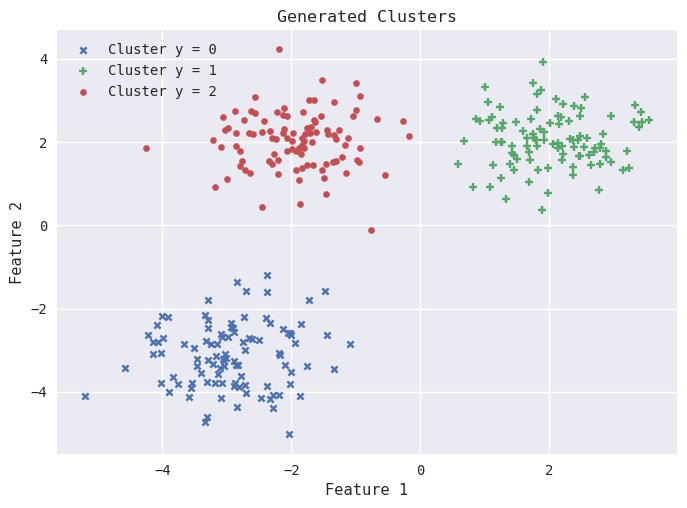

In [427]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [428]:
y_encoded = categorical(y.int(), 3)
print(f"New y (One-Hot Encoded):\n{y_encoded}")

New y (One-Hot Encoded):
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
       

In [429]:
Model = LogisticRegression(in_dims=2, out_dims=3, multinomial=True).to(DEVICE)

In [430]:
Data = TensorDataset(X, y_encoded)
Data.tensors

(tensor([[-2.7512, -2.7946],
         [-2.1307, -2.4875],
         [-2.3836, -3.8683],
         [-2.9353, -2.4530],
         [-3.0687, -2.6786],
         [-4.5739, -3.4344],
         [-3.2882, -3.2309],
         [-2.0002, -3.5317],
         [-1.3347, -3.4514],
         [-3.9028, -3.9995],
         [-2.3823, -1.6104],
         [-2.0279, -3.8243],
         [-4.0618, -2.7979],
         [-3.9903, -2.7070],
         [-2.8461, -1.3694],
         [-2.8983, -2.4761],
         [-2.1862, -3.0686],
         [-3.0620, -3.2175],
         [-3.3978, -3.5380],
         [-2.0549, -2.5967],
         [-3.3377, -2.1441],
         [-1.8702, -4.1092],
         [-1.4461, -2.6340],
         [-3.5510, -3.9119],
         [-3.0987, -2.6178],
         [-2.7874, -3.6244],
         [-3.5854, -4.1254],
         [-4.0207, -3.7833],
         [-1.0950, -2.8581],
         [-2.8698, -3.7945],
         [-2.0320, -5.0249],
         [-3.6647, -2.8427],
         [-4.2188, -2.6431],
         [-2.6972, -1.5818],
         [-1.7

In [431]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [432]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.CrossEntropyLoss(reduction='mean'),        # Cross-entropy Loss (For classification)
    device=DEVICE
)

In [433]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

: 100%|██████████| 8/8 [00:00<00:00, 940.45it/s]


Loss: 0.9277
	| Validation Loss: 0.8209



: 100%|██████████| 8/8 [00:00<00:00, 794.53it/s]


Loss: 0.7661
	| Validation Loss: 0.7141



: 100%|██████████| 8/8 [00:00<00:00, 940.43it/s]


Loss: 0.7012
	| Validation Loss: 0.6695



: 100%|██████████| 8/8 [00:00<00:00, 933.73it/s]


Loss: 0.6672
	| Validation Loss: 0.6478



: 100%|██████████| 8/8 [00:00<00:00, 963.65it/s]


Loss: 0.6472
	| Validation Loss: 0.6319



: 100%|██████████| 8/8 [00:00<00:00, 1142.67it/s]


Loss: 0.6348
	| Validation Loss: 0.6218



: 100%|██████████| 8/8 [00:00<00:00, 881.18it/s]


Loss: 0.6247
	| Validation Loss: 0.6132



: 100%|██████████| 8/8 [00:00<00:00, 939.79it/s]


Loss: 0.6175
	| Validation Loss: 0.6068



: 100%|██████████| 8/8 [00:00<00:00, 1062.39it/s]


Loss: 0.6100
	| Validation Loss: 0.6017



: 100%|██████████| 8/8 [00:00<00:00, 937.35it/s]


Loss: 0.6052
	| Validation Loss: 0.5974



: 100%|██████████| 8/8 [00:00<00:00, 803.83it/s]


Loss: 0.6009
	| Validation Loss: 0.5944



: 100%|██████████| 8/8 [00:00<00:00, 717.90it/s]


Loss: 0.5983
	| Validation Loss: 0.5915



: 100%|██████████| 8/8 [00:00<00:00, 1138.02it/s]


Loss: 0.5958
	| Validation Loss: 0.5881



: 100%|██████████| 8/8 [00:00<00:00, 992.21it/s]


Loss: 0.5942
	| Validation Loss: 0.5875



: 100%|██████████| 8/8 [00:00<00:00, 694.29it/s]


Loss: 0.5919
	| Validation Loss: 0.5855



: 100%|██████████| 8/8 [00:00<00:00, 761.82it/s]


Loss: 0.5892
	| Validation Loss: 0.5834



: 100%|██████████| 8/8 [00:00<00:00, 999.51it/s]


Loss: 0.5880
	| Validation Loss: 0.5818



: 100%|██████████| 8/8 [00:00<00:00, 1226.63it/s]


Loss: 0.5861
	| Validation Loss: 0.5805



: 100%|██████████| 8/8 [00:00<00:00, 937.01it/s]


Loss: 0.5860
	| Validation Loss: 0.5790



: 100%|██████████| 8/8 [00:00<00:00, 921.85it/s]

Loss: 0.5839
	| Validation Loss: 0.5780



In [434]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{0: 0.9276816248893738, 1: 0.7660893425345421, 2: 0.7012215331196785, 3: 0.6671797633171082, 4: 0.6471679210662842, 5: 0.6347700878977776, 6: 0.6246985644102097, 7: 0.6175010353326797, 8: 0.6100226566195488, 9: 0.6052407473325729, 10: 0.6008811742067337, 11: 0.5983009189367294, 12: 0.5958471521735191, 13: 0.594193309545517, 14: 0.5918926075100899, 15: 0.5891892239451408, 16: 0.5879890695214272, 17: 0.5860503539443016, 18: 0.586017057299614, 19: 0.583890974521637}

Validation Loss:
{0: 0.820887416601181, 1: 0.7141011655330658, 2: 0.6694919466972351, 3: 0.6477559804916382, 4: 0.6319398283958435, 5: 0.6218014359474182, 6: 0.6132441759109497, 7: 0.6067571043968201, 8: 0.6017379760742188, 9: 0.5974425375461578, 10: 0.5944258868694305, 11: 0.5914903879165649, 12: 0.5880557894706726, 13: 0.5874574184417725, 14: 0.5855047702789307, 15: 0.5833962261676788, 16: 0.5817613005638123, 17: 0.5804846286773682, 18: 0.5789695382118225, 19: 0.5779864490032196}


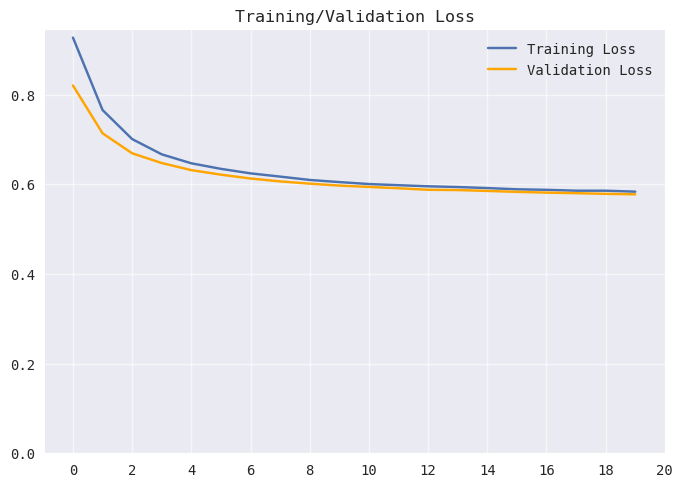

In [435]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=-0);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [436]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.linear.weight), "Bias: {}".format(Model.linear.bias), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([[-0.9608, -1.2537],
        [ 0.8897,  0.2527],
        [-1.1354,  0.4164]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([-0.1543,  0.3141,  0.3417], device='cuda:0', requires_grad=True)


In [437]:
print(f"Shapes for Weight and Bias Tensors:", Model.linear.weight.shape, Model.linear.bias.shape, sep="\n")

Shapes for Weight and Bias Tensors:
torch.Size([3, 2])
torch.Size([3])


In [438]:
weights = Model.linear.weight.detach().cpu().numpy()
biases = Model.linear.bias.detach().cpu().numpy()

Xmin, Xmax = X[:, 0].min() - .5, X[:, 0].max() + .5
ymin, ymax = X[:, 1].min() - .5, X[:, 1].max() + .5

In [439]:
xx, yy = np.meshgrid(np.linspace(Xmin, Xmax, SIZE), np.linspace(ymin, ymax, SIZE))
grid = np.c_[xx.flatten(), yy.flatten()]

scores = grid @ weights.T + biases
predicted_classes = np.argmax(scores, axis=1).reshape(xx.shape)

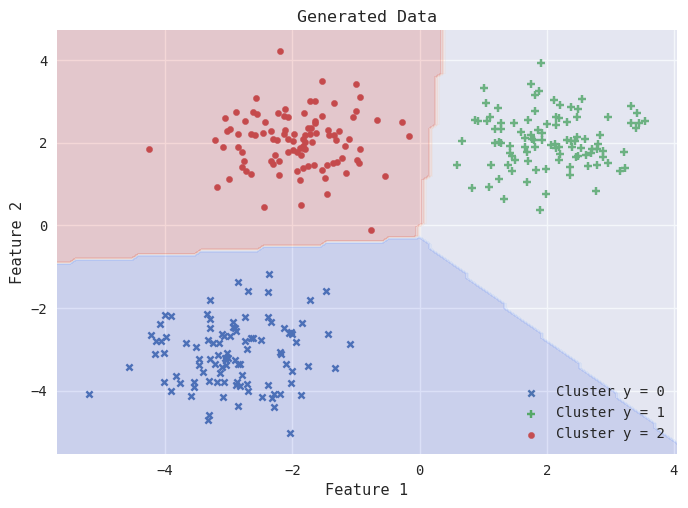

In [440]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)

plt.contourf(xx, yy, predicted_classes, alpha=0.2, cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Generated Data");
plt.legend(loc='lower right');
plt.show();